In [17]:
import pickle
from negbin import *
from src.inference import *
from src.criticism import *
from src.preprocess_bikeshare import *


In [11]:
with open('data/final_train_small.pickle', 'rb') as f:
    data_samp = pickle.load(f)

In [12]:
data, features = feature_generation(data_samp)
p = NegBinReg(features, data)

# Does overdispersion affect our poisson model?
Overdispersion is when the variance in your data is greater than the mean. In our Poisson based model, demand
$Y \sim Poisson(\beta X)$ the $E[Y]$ was forced to $= Var[Y]$ by the nature of the Poisson distribution. While there are statistical test for this, we intuitively posit that in our data $Var[Y] > E[Y]$ because the Posterior predictive Y could not fully cover the fringes of our data as illustated in Model Evaluation of the ZIP.

# The Negative Binomial model  



In [13]:
svi, elbo_loss = run_svi(p.model, p.guide,
                         iters=5000,
                         data=data['data'],
                         demand=data['demand'],
                         filename='models/negbin_params.pkl')

probs are tensor([0.1668, 0.1668, 0.1668,  ..., 0.1646, 0.1646, 0.2248],
       grad_fn=<SigmoidBackward>)


/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin.py:112: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  total_count_loc = pyro.param('total_count_loc', torch.tensor(5.),
/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin.py:144: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  torch.tensor(0.5)))


probs are tensor([0.3071, 0.3071, 0.3071,  ..., 0.1405, 0.1405, 0.1305],
       grad_fn=<SigmoidBackward>)


/Users/nihaar/Documents/virtual-envs/MLwPP/lib/python3.6/site-packages/torch/tensor.py:410: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)
/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin.py:90: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  with pyro.plate("data", len(data)):
Elbo loss: 18526.302734375
Elbo loss: 4233.81201171875
Elbo loss: 3671.511474609375
Elbo loss: 3677.28369140625
Elbo loss: 3510.73193359375
Elbo loss: 3522.061767578125
Elbo loss: 3476.681640625
Elbo loss: 3465.373046875
E

In [14]:
svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                  svi=svi)

probs are tensor([0.0361, 0.0361, 0.0361,  ..., 0.0252, 0.0252, 0.0464],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0262, 0.0262, 0.0262,  ..., 0.0209, 0.0209, 0.0581],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0157, 0.0157, 0.0157,  ..., 0.0357, 0.0357, 0.0674],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0172, 0.0172, 0.0172,  ..., 0.0308, 0.0308, 0.0484],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0143, 0.0143, 0.0143,  ..., 0.0422, 0.0422, 0.0926],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0154, 0.0154, 0.0154,  ..., 0.0270, 0.0270, 0.0469],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0320, 0.0320, 0.0320,  ..., 0.0322, 0.0322, 0.0721],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0315, 0.0315, 0.0315,  ..., 0.0128, 0.0128, 0.0259],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0134, 0.0134, 0.0134,  ..., 0.0336, 0.0336, 0.0530],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0120, 0.0120, 0.0

probs are tensor([0.0238, 0.0238, 0.0238,  ..., 0.0120, 0.0120, 0.0402],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0135, 0.0135, 0.0135,  ..., 0.0237, 0.0237, 0.0492],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0275, 0.0275, 0.0275,  ..., 0.0365, 0.0365, 0.0538],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0161, 0.0161, 0.0161,  ..., 0.0244, 0.0244, 0.0487],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0304, 0.0304, 0.0304,  ..., 0.0209, 0.0209, 0.0550],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0239, 0.0239, 0.0239,  ..., 0.0214, 0.0214, 0.0281],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0259, 0.0259, 0.0259,  ..., 0.0219, 0.0219, 0.0372],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0231, 0.0231, 0.0231,  ..., 0.0278, 0.0278, 0.0685],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0331, 0.0331, 0.0331,  ..., 0.0259, 0.0259, 0.0539],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0251, 0.0251, 0.0

probs are tensor([0.0147, 0.0147, 0.0147,  ..., 0.0204, 0.0204, 0.0535],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0182, 0.0182, 0.0182,  ..., 0.0401, 0.0401, 0.0497],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0245, 0.0245, 0.0245,  ..., 0.0374, 0.0374, 0.0629],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0194, 0.0194, 0.0194,  ..., 0.0150, 0.0150, 0.0282],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0115, 0.0115, 0.0115,  ..., 0.0201, 0.0201, 0.0235],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0183, 0.0183, 0.0183,  ..., 0.0151, 0.0151, 0.0314],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0266, 0.0266, 0.0266,  ..., 0.0436, 0.0436, 0.0894],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0235, 0.0235, 0.0235,  ..., 0.0368, 0.0368, 0.0688],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0224, 0.0224, 0.0224,  ..., 0.0214, 0.0214, 0.0348],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0274, 0.0274, 0.0

probs are tensor([0.0239, 0.0239, 0.0239,  ..., 0.0224, 0.0224, 0.0542],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0284, 0.0284, 0.0284,  ..., 0.0317, 0.0317, 0.0546],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0153, 0.0153, 0.0153,  ..., 0.0392, 0.0392, 0.0573],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0211, 0.0211, 0.0211,  ..., 0.0160, 0.0160, 0.0400],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0124, 0.0124, 0.0124,  ..., 0.0309, 0.0309, 0.0536],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0116, 0.0116, 0.0116,  ..., 0.0196, 0.0196, 0.0601],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0215, 0.0215, 0.0215,  ..., 0.0329, 0.0329, 0.0469],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0176, 0.0176, 0.0176,  ..., 0.0292, 0.0292, 0.0687],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0310, 0.0310, 0.0310,  ..., 0.0288, 0.0288, 0.0647],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0174, 0.0174, 0.0

probs are tensor([0.0107, 0.0107, 0.0107,  ..., 0.0384, 0.0384, 0.0915],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0237, 0.0237, 0.0237,  ..., 0.0188, 0.0188, 0.0467],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0173, 0.0173, 0.0173,  ..., 0.0246, 0.0246, 0.0409],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0312, 0.0312, 0.0312,  ..., 0.0344, 0.0344, 0.0555],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0287, 0.0287, 0.0287,  ..., 0.0382, 0.0382, 0.0594],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0372, 0.0372, 0.0372,  ..., 0.0465, 0.0465, 0.0942],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0275, 0.0275, 0.0275,  ..., 0.0358, 0.0358, 0.0761],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0280, 0.0280, 0.0280,  ..., 0.0317, 0.0317, 0.0632],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0160, 0.0160, 0.0160,  ..., 0.0217, 0.0217, 0.0614],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0224, 0.0224, 0.0

probs are tensor([0.0200, 0.0200, 0.0200,  ..., 0.0205, 0.0205, 0.0394],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0171, 0.0171, 0.0171,  ..., 0.0260, 0.0260, 0.0499],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0240, 0.0240, 0.0240,  ..., 0.0364, 0.0364, 0.0568],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0149, 0.0149, 0.0149,  ..., 0.0349, 0.0349, 0.0562],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0301, 0.0301, 0.0301,  ..., 0.0298, 0.0298, 0.0453],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0236, 0.0236, 0.0236,  ..., 0.0382, 0.0382, 0.0640],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0239, 0.0239, 0.0239,  ..., 0.0318, 0.0318, 0.0569],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0246, 0.0246, 0.0246,  ..., 0.0273, 0.0273, 0.0611],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0389, 0.0389, 0.0389,  ..., 0.0323, 0.0323, 0.0857],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0160, 0.0160, 0.0

probs are tensor([0.0202, 0.0202, 0.0202,  ..., 0.0281, 0.0281, 0.0595],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0118, 0.0118, 0.0118,  ..., 0.0312, 0.0312, 0.0544],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0338, 0.0338, 0.0338,  ..., 0.0126, 0.0126, 0.0480],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0167, 0.0167, 0.0167,  ..., 0.0389, 0.0389, 0.0848],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0160, 0.0160, 0.0160,  ..., 0.0181, 0.0181, 0.0325],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0215, 0.0215, 0.0215,  ..., 0.0367, 0.0367, 0.0721],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0223, 0.0223, 0.0223,  ..., 0.0251, 0.0251, 0.0512],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0319, 0.0319, 0.0319,  ..., 0.0315, 0.0315, 0.0592],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0131, 0.0131, 0.0131,  ..., 0.0375, 0.0375, 0.0647],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0329, 0.0329, 0.0

probs are tensor([0.0227, 0.0227, 0.0227,  ..., 0.0253, 0.0253, 0.0532],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0163, 0.0163, 0.0163,  ..., 0.0241, 0.0241, 0.0557],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0300, 0.0300, 0.0300,  ..., 0.0358, 0.0358, 0.1017],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0136, 0.0136, 0.0136,  ..., 0.0274, 0.0274, 0.0572],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0219, 0.0219, 0.0219,  ..., 0.0336, 0.0336, 0.0518],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0364, 0.0364, 0.0364,  ..., 0.0172, 0.0172, 0.0397],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0155, 0.0155, 0.0155,  ..., 0.0324, 0.0324, 0.0572],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0364, 0.0364, 0.0364,  ..., 0.0320, 0.0320, 0.0575],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0130, 0.0130, 0.0130,  ..., 0.0179, 0.0179, 0.0374],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0364, 0.0364, 0.0

probs are tensor([0.0281, 0.0281, 0.0281,  ..., 0.0535, 0.0535, 0.0760],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0176, 0.0176, 0.0176,  ..., 0.0223, 0.0223, 0.0383],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0146, 0.0146, 0.0146,  ..., 0.0154, 0.0154, 0.0335],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0196, 0.0196, 0.0196,  ..., 0.0250, 0.0250, 0.0561],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0254, 0.0254, 0.0254,  ..., 0.0198, 0.0198, 0.0597],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0293, 0.0293, 0.0293,  ..., 0.0273, 0.0273, 0.0538],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0169, 0.0169, 0.0169,  ..., 0.0203, 0.0203, 0.0381],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0237, 0.0237, 0.0237,  ..., 0.0176, 0.0176, 0.0432],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0309, 0.0309, 0.0309,  ..., 0.0303, 0.0303, 0.0589],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0315, 0.0315, 0.0

probs are tensor([0.0273, 0.0273, 0.0273,  ..., 0.0224, 0.0224, 0.0577],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0290, 0.0290, 0.0290,  ..., 0.0706, 0.0706, 0.0747],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0261, 0.0261, 0.0261,  ..., 0.0170, 0.0170, 0.0457],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0316, 0.0316, 0.0316,  ..., 0.0177, 0.0177, 0.0413],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0187, 0.0187, 0.0187,  ..., 0.0468, 0.0468, 0.0613],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0197, 0.0197, 0.0197,  ..., 0.0233, 0.0233, 0.0400],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0179, 0.0179, 0.0179,  ..., 0.0216, 0.0216, 0.0621],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0317, 0.0317, 0.0317,  ..., 0.0324, 0.0324, 0.0795],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0355, 0.0355, 0.0355,  ..., 0.0191, 0.0191, 0.0313],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0207, 0.0207, 0.0

probs are tensor([0.0209, 0.0209, 0.0209,  ..., 0.0407, 0.0407, 0.0637],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0221, 0.0221, 0.0221,  ..., 0.0185, 0.0185, 0.0479],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0245, 0.0245, 0.0245,  ..., 0.0706, 0.0706, 0.1180],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0181, 0.0181, 0.0181,  ..., 0.0226, 0.0226, 0.0414],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0172, 0.0172, 0.0172,  ..., 0.0338, 0.0338, 0.0548],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0165, 0.0165, 0.0165,  ..., 0.0233, 0.0233, 0.0449],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0275, 0.0275, 0.0275,  ..., 0.0298, 0.0298, 0.0655],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0204, 0.0204, 0.0204,  ..., 0.0229, 0.0229, 0.0426],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0314, 0.0314, 0.0314,  ..., 0.0425, 0.0425, 0.0722],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0260, 0.0260, 0.0

probs are tensor([0.0213, 0.0213, 0.0213,  ..., 0.0192, 0.0192, 0.0581],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0369, 0.0369, 0.0369,  ..., 0.0193, 0.0193, 0.0628],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0242, 0.0242, 0.0242,  ..., 0.0258, 0.0258, 0.0387],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0152, 0.0152, 0.0152,  ..., 0.0258, 0.0258, 0.0579],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0158, 0.0158, 0.0158,  ..., 0.0270, 0.0270, 0.0395],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0214, 0.0214, 0.0214,  ..., 0.0409, 0.0409, 0.0501],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0193, 0.0193, 0.0193,  ..., 0.0261, 0.0261, 0.0530],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0321, 0.0321, 0.0321,  ..., 0.0197, 0.0197, 0.0293],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0110, 0.0110, 0.0110,  ..., 0.0288, 0.0288, 0.0532],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0482, 0.0482, 0.0

probs are tensor([0.0149, 0.0149, 0.0149,  ..., 0.0616, 0.0616, 0.0920],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0255, 0.0255, 0.0255,  ..., 0.0251, 0.0251, 0.0468],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0222, 0.0222, 0.0222,  ..., 0.0296, 0.0296, 0.0667],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0236, 0.0236, 0.0236,  ..., 0.0479, 0.0479, 0.0836],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0243, 0.0243, 0.0243,  ..., 0.0155, 0.0155, 0.0402],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0261, 0.0261, 0.0261,  ..., 0.0258, 0.0258, 0.0420],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0250, 0.0250, 0.0250,  ..., 0.0314, 0.0314, 0.0396],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0164, 0.0164, 0.0164,  ..., 0.0252, 0.0252, 0.0493],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0154, 0.0154, 0.0154,  ..., 0.0261, 0.0261, 0.0630],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0328, 0.0328, 0.0

In [15]:
print(svi.information_criterion())

OrderedDict([('waic', tensor(6751.3032, grad_fn=<SumBackward0>)), ('p_waic', tensor(163.2843, grad_fn=<SumBackward0>))])


In [20]:
    post_samples = ppd_samples(
        p.wrapped_model,
        svi_posterior,
        data,
        ['obs'],
        num_samples=1000)

probs are tensor([0.4000, 0.4000, 0.4000,  ..., 0.6071, 0.6071, 0.0948])
probs are tensor([0.0220, 0.0220, 0.0220,  ..., 0.0440, 0.0440, 0.0738],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0207, 0.0207, 0.0207,  ..., 0.0416, 0.0416, 0.0670],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0279, 0.0279, 0.0279,  ..., 0.0198, 0.0198, 0.0350],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0230, 0.0230, 0.0230,  ..., 0.0393, 0.0393, 0.0590],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0280, 0.0280, 0.0280,  ..., 0.0361, 0.0361, 0.0663],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0154, 0.0154, 0.0154,  ..., 0.0184, 0.0184, 0.0455],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0400, 0.0400, 0.0400,  ..., 0.0306, 0.0306, 0.0636],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0253, 0.0253, 0.0253,  ..., 0.0456, 0.0456, 0.0772],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0242, 0.0242, 0.0242,  ..., 0.0229, 0.0229, 0.0407]

probs are tensor([0.0136, 0.0136, 0.0136,  ..., 0.0274, 0.0274, 0.0572],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0378, 0.0378, 0.0378,  ..., 0.0291, 0.0291, 0.0478],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0212, 0.0212, 0.0212,  ..., 0.0207, 0.0207, 0.0634],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0236, 0.0236, 0.0236,  ..., 0.0382, 0.0382, 0.0640],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0171, 0.0171, 0.0171,  ..., 0.0260, 0.0260, 0.0499],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0124, 0.0124, 0.0124,  ..., 0.0309, 0.0309, 0.0536],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0168, 0.0168, 0.0168,  ..., 0.0395, 0.0395, 0.0542],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0246, 0.0246, 0.0246,  ..., 0.0273, 0.0273, 0.0611],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0128, 0.0128, 0.0128,  ..., 0.0234, 0.0234, 0.0413],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0141, 0.0141, 0.0

probs are tensor([0.0279, 0.0279, 0.0279,  ..., 0.0198, 0.0198, 0.0373],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0152, 0.0152, 0.0152,  ..., 0.0258, 0.0258, 0.0579],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0256, 0.0256, 0.0256,  ..., 0.0260, 0.0260, 0.0555],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0384, 0.0384, 0.0384,  ..., 0.0448, 0.0448, 0.0762],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0261, 0.0261, 0.0261,  ..., 0.0511, 0.0511, 0.0680],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0187, 0.0187, 0.0187,  ..., 0.0368, 0.0368, 0.0892],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0529, 0.0529, 0.0529,  ..., 0.0453, 0.0453, 0.0721],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0160, 0.0160, 0.0160,  ..., 0.0576, 0.0576, 0.0756],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0219, 0.0219, 0.0219,  ..., 0.0240, 0.0240, 0.0414],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0224, 0.0224, 0.0

probs are tensor([0.0212, 0.0212, 0.0212,  ..., 0.0207, 0.0207, 0.0634],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0315, 0.0315, 0.0315,  ..., 0.0407, 0.0407, 0.0500],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0122, 0.0122, 0.0122,  ..., 0.0301, 0.0301, 0.0852],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0252, 0.0252, 0.0252,  ..., 0.0466, 0.0466, 0.0885],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0161, 0.0161, 0.0161,  ..., 0.0182, 0.0182, 0.0416],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0091, 0.0091, 0.0091,  ..., 0.0249, 0.0249, 0.0398],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0114, 0.0114, 0.0114,  ..., 0.0321, 0.0321, 0.0658],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0209, 0.0209, 0.0209,  ..., 0.0186, 0.0186, 0.0665],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0188, 0.0188, 0.0188,  ..., 0.0218, 0.0218, 0.0446],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0165, 0.0165, 0.0

probs are tensor([0.0285, 0.0285, 0.0285,  ..., 0.0125, 0.0125, 0.0319],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0246, 0.0246, 0.0246,  ..., 0.0149, 0.0149, 0.0309],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0259, 0.0259, 0.0259,  ..., 0.0219, 0.0219, 0.0372],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0213, 0.0213, 0.0213,  ..., 0.0361, 0.0361, 0.0756],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0352, 0.0352, 0.0352,  ..., 0.0289, 0.0289, 0.0542],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0074, 0.0074, 0.0074,  ..., 0.0204, 0.0204, 0.0464],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0214, 0.0214, 0.0214,  ..., 0.0223, 0.0223, 0.0490],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0309, 0.0309, 0.0309,  ..., 0.0228, 0.0228, 0.0451],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0254, 0.0254, 0.0254,  ..., 0.0451, 0.0451, 0.0939],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0161, 0.0161, 0.0

probs are tensor([0.0170, 0.0170, 0.0170,  ..., 0.0338, 0.0338, 0.0484],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0236, 0.0236, 0.0236,  ..., 0.0479, 0.0479, 0.0836],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0276, 0.0276, 0.0276,  ..., 0.0255, 0.0255, 0.0620],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0311, 0.0311, 0.0311,  ..., 0.0363, 0.0363, 0.0681],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0214, 0.0214, 0.0214,  ..., 0.0283, 0.0283, 0.0329],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0179, 0.0179, 0.0179,  ..., 0.0260, 0.0260, 0.0722],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0153, 0.0153, 0.0153,  ..., 0.0280, 0.0280, 0.0416],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0304, 0.0304, 0.0304,  ..., 0.0209, 0.0209, 0.0550],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0146, 0.0146, 0.0146,  ..., 0.0154, 0.0154, 0.0335],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0197, 0.0197, 0.0

probs are tensor([0.0220, 0.0220, 0.0220,  ..., 0.0305, 0.0305, 0.0580],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0312, 0.0312, 0.0312,  ..., 0.0520, 0.0520, 0.0828],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0155, 0.0155, 0.0155,  ..., 0.0331, 0.0331, 0.0515],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0242, 0.0242, 0.0242,  ..., 0.0361, 0.0361, 0.0681],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0313, 0.0313, 0.0313,  ..., 0.0209, 0.0209, 0.0469],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0284, 0.0284, 0.0284,  ..., 0.0317, 0.0317, 0.0546],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0293, 0.0293, 0.0293,  ..., 0.0376, 0.0376, 0.0478],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0219, 0.0219, 0.0219,  ..., 0.0336, 0.0336, 0.0518],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0211, 0.0211, 0.0211,  ..., 0.0352, 0.0352, 0.0822],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0201, 0.0201, 0.0

probs are tensor([0.0262, 0.0262, 0.0262,  ..., 0.0281, 0.0281, 0.0540],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0282, 0.0282, 0.0282,  ..., 0.0120, 0.0120, 0.0487],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0202, 0.0202, 0.0202,  ..., 0.0201, 0.0201, 0.0336],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0263, 0.0263, 0.0263,  ..., 0.0369, 0.0369, 0.0787],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0178, 0.0178, 0.0178,  ..., 0.0380, 0.0380, 0.0447],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0201, 0.0201, 0.0201,  ..., 0.0179, 0.0179, 0.0426],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0342, 0.0342, 0.0342,  ..., 0.0346, 0.0346, 0.0778],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0157, 0.0157, 0.0157,  ..., 0.0218, 0.0218, 0.0352],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0206, 0.0206, 0.0206,  ..., 0.0236, 0.0236, 0.0442],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0179, 0.0179, 0.0

probs are tensor([0.0258, 0.0258, 0.0258,  ..., 0.0398, 0.0398, 0.0684],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0201, 0.0201, 0.0201,  ..., 0.0227, 0.0227, 0.0512],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0204, 0.0204, 0.0204,  ..., 0.0229, 0.0229, 0.0426],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0185, 0.0185, 0.0185,  ..., 0.0143, 0.0143, 0.0349],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0235, 0.0235, 0.0235,  ..., 0.0368, 0.0368, 0.0688],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0114, 0.0114, 0.0114,  ..., 0.0566, 0.0566, 0.0852],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0252, 0.0252, 0.0252,  ..., 0.0255, 0.0255, 0.0414],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0183, 0.0183, 0.0183,  ..., 0.0286, 0.0286, 0.0505],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0213, 0.0213, 0.0213,  ..., 0.0248, 0.0248, 0.0540],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0263, 0.0263, 0.0

probs are tensor([0.0215, 0.0215, 0.0215,  ..., 0.0367, 0.0367, 0.0721],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0279, 0.0279, 0.0279,  ..., 0.0333, 0.0333, 0.0637],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0174, 0.0174, 0.0174,  ..., 0.0389, 0.0389, 0.0728],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0200, 0.0200, 0.0200,  ..., 0.0321, 0.0321, 0.0659],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0238, 0.0238, 0.0238,  ..., 0.0567, 0.0567, 0.0851],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0348, 0.0348, 0.0348,  ..., 0.0438, 0.0438, 0.0742],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0202, 0.0202, 0.0202,  ..., 0.0201, 0.0201, 0.0336],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0211, 0.0211, 0.0211,  ..., 0.0352, 0.0352, 0.0822],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0192, 0.0192, 0.0192,  ..., 0.0285, 0.0285, 0.0826],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0321, 0.0321, 0.0

probs are tensor([0.0226, 0.0226, 0.0226,  ..., 0.0339, 0.0339, 0.0816],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0200, 0.0200, 0.0200,  ..., 0.0478, 0.0478, 0.0796],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0284, 0.0284, 0.0284,  ..., 0.0317, 0.0317, 0.0546],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0158, 0.0158, 0.0158,  ..., 0.0270, 0.0270, 0.0395],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0407, 0.0407, 0.0407,  ..., 0.0319, 0.0319, 0.0453],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0207, 0.0207, 0.0207,  ..., 0.0340, 0.0340, 0.0526],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0252, 0.0252, 0.0252,  ..., 0.0249, 0.0249, 0.0688],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0239, 0.0239, 0.0239,  ..., 0.0214, 0.0214, 0.0281],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0348, 0.0348, 0.0348,  ..., 0.0170, 0.0170, 0.0297],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0231, 0.0231, 0.0

probs are tensor([0.0309, 0.0309, 0.0309,  ..., 0.0228, 0.0228, 0.0451],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0210, 0.0210, 0.0210,  ..., 0.0276, 0.0276, 0.0492],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0277, 0.0277, 0.0277,  ..., 0.0244, 0.0244, 0.0491],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0188, 0.0188, 0.0188,  ..., 0.0220, 0.0220, 0.0383],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0178, 0.0178, 0.0178,  ..., 0.0345, 0.0345, 0.0565],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0291, 0.0291, 0.0291,  ..., 0.0194, 0.0194, 0.0333],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0317, 0.0317, 0.0317,  ..., 0.0244, 0.0244, 0.0785],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0182, 0.0182, 0.0182,  ..., 0.0301, 0.0301, 0.0451],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0200, 0.0200, 0.0200,  ..., 0.0478, 0.0478, 0.0796],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0342, 0.0342, 0.0

probs are tensor([0.0122, 0.0122, 0.0122,  ..., 0.0276, 0.0276, 0.0554],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0242, 0.0242, 0.0242,  ..., 0.0275, 0.0275, 0.0441],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0342, 0.0342, 0.0342,  ..., 0.0346, 0.0346, 0.0778],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0256, 0.0256, 0.0256,  ..., 0.0158, 0.0158, 0.0382],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0260, 0.0260, 0.0260,  ..., 0.0351, 0.0351, 0.0492],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0228, 0.0228, 0.0228,  ..., 0.0344, 0.0344, 0.0654],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0275, 0.0275, 0.0275,  ..., 0.0255, 0.0255, 0.0495],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0122, 0.0122, 0.0122,  ..., 0.0464, 0.0464, 0.0582],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0250, 0.0250, 0.0250,  ..., 0.0314, 0.0314, 0.0396],
       grad_fn=<SigmoidBackward>)
probs are tensor([0.0208, 0.0208, 0.0

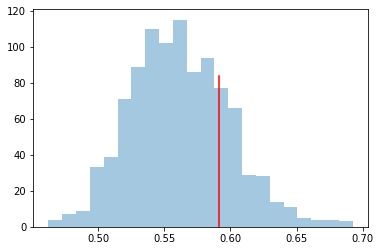

In [21]:
    compare_test_statistic(data_samp.demand.values, post_samples[:,0,:],
                           stat=perc_0)

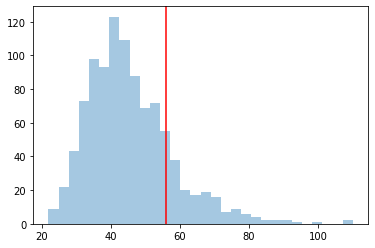

In [25]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                           stat=max_)

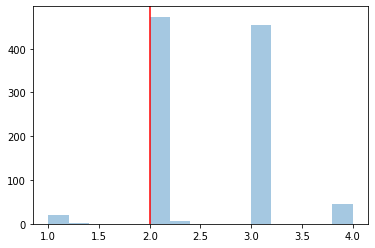

In [23]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                           stat=percentile, q=80)

In [24]:
summary = site_summary(post_samples, ['obs'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

79


torch.Size([2800, 83])

In [17]:
b

{'station': {'names': array(['station_2', 'station_3', 'station_4', 'station_5', 'station_6',
         'station_7', 'station_8', 'station_9', 'station_10', 'station_11',
         'station_12', 'station_13', 'station_14', 'station_16',
         'station_21', 'station_22', 'station_23', 'station_24',
         'station_25', 'station_26', 'station_27', 'station_28',
         'station_29', 'station_30', 'station_31', 'station_32',
         'station_33', 'station_34', 'station_35', 'station_36',
         'station_37', 'station_38', 'station_39', 'station_41',
         'station_42', 'station_45', 'station_46', 'station_47',
         'station_48', 'station_49', 'station_50', 'station_51',
         'station_54', 'station_55', 'station_56', 'station_57',
         'station_58', 'station_59', 'station_60', 'station_61',
         'station_62', 'station_63', 'station_64', 'station_65',
         'station_66', 'station_67', 'station_68', 'station_69',
         'station_70', 'station_71', 'station_72',